# DNN 구축과 훈련 실습

## 라이브러리 불러오기

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
## 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


## 하이퍼 파라미터

In [5]:
learning_rate = 0.001
training_epochs = 10
batch_size = 128
n_class = 10

## MNIST 데이터셋

In [6]:
## MNIST Dataset 
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Fashion MNIST Dataset 
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터셋 불러오기

In [7]:
## MNIST dataset load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

## 연습1: 데이터셋 불러오기

In [8]:
## train_images, train_labels의 type 확인
type(train_images)

numpy.ndarray

In [9]:
## train_images, train_labels의 shape 확인
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [10]:
## test_images, test_labels의 shape 확인


In [11]:
## training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts)) # 데이터 불균형 없음  ! 

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [12]:
## test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts)) # 이렇게 표현하는거 

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

In [13]:
## train dataset, test dataset의 개수 저장
n_train = train_images.shape[0]
n_test = test_images.shape[0]
print('train data 수: ', n_train)
print(' test data 수: ', n_test)

train data 수:  60000
 test data 수:  10000


In [14]:
print(train_labels[2])

4


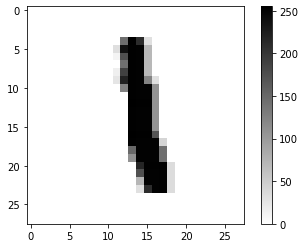

In [15]:
## train_images의 0번 image 화면에 출력
plt.figure()
plt.imshow(train_images[6], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

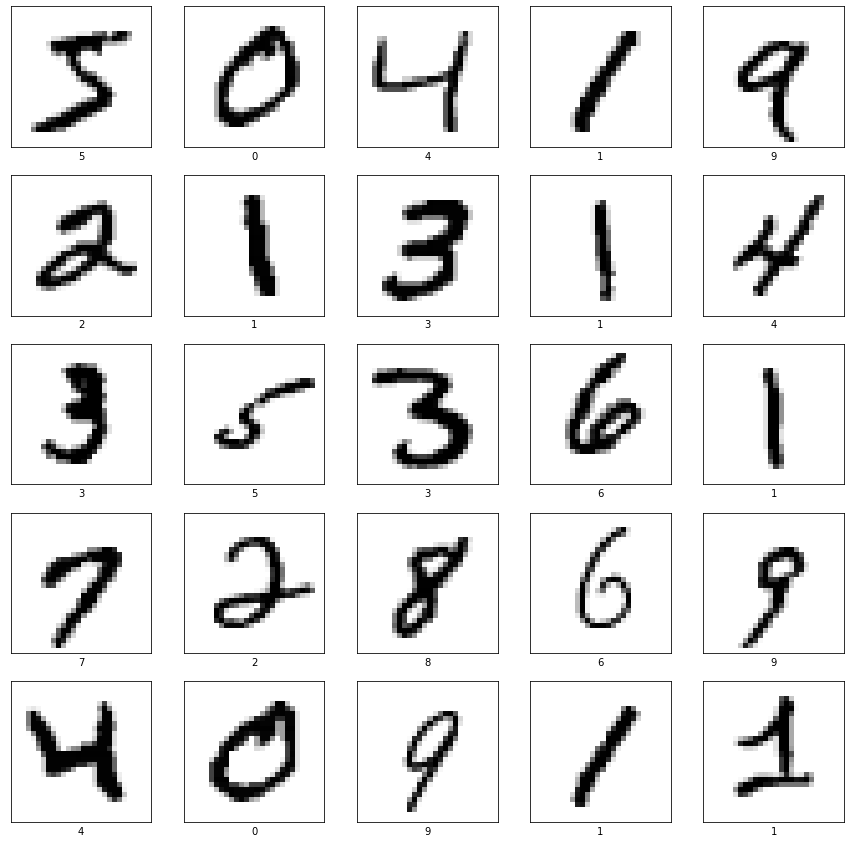

In [16]:
## 25개의 train image와 label 화면에 출력
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [17]:
## image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
print('<nomalizing pixel values>')
print('before: ', train_images[0,13,12:17])
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
print('after:  ', train_images[0,13,12:17])
print()

<nomalizing pixel values>
before:  [ 35 241 225 160 108]
after:   [0.13725491 0.94509804 0.88235295 0.627451   0.42352942]



## 연습2: 원핫인코딩

In [18]:
## one-hot encodin을 완성하라.
## to_categorical(레이블, n_class)을 사용  => categorical_crossentropy로 매치하는 것 기억  (정수: sparse_categorial_crossentropy
print('<one-hot encoding>')
print('before: ', train_labels[:5])
train_labels = to_categorical(train_labels, n_class)
test_labels = to_categorical(test_labels, n_class)
#  to do
print('after:  ', train_labels[:5])

<one-hot encoding>
before:  [5 0 4 1 9]
after:   [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 연습3: 데이터셋 구성

In [19]:
## dataset 구성
# from_tensor_slices, shuffe, batch, repeat를 사용해보라. 
# 참조 
#1. repeat(step_n) : 원하는 epoch 수를 넣을 수 있다. 아무런 파라미터를 주지 않는다면 iteration이 무제한으로 돌아간다.
#2. shuffle(1000) : 한번 epoch이 돌고나서 랜덤하게 섞을 것인지 정한다.
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).shuffle(buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_labels)).batch(batch_size)

## 신경망으로 구현한 로지스틱 회귀 모델

## 연습 4: 신경망 로지스틱 회귀 모델 구축

In [20]:
# 힌트: Dense, 클래스 10개, softmax를 사용해라.
def create_lr_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28))) #28*28 짜리니까 1열로 만들어줘야함 ( 잘모르겠음 나중에 찾아바야함)
    model.add(keras.layers.Dense(10,activation = 'softmax'))
    
    return model

In [21]:
lr_model = create_lr_model()
lr_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 연습 5. 모델 컴파일

## 모델 컴파일 (최적화와 손실함수) 

In [22]:
# 다음을 사용해 컴파일을 완성하라
# keras.optimizers.Adam, learning_rate, 손실함수는 categorical_crossentropy, 성과척도는 accaury로 시도해보라
# 최적화(optimizer), 손실함수(loss), 성과척도(metrics) 정의하는 것


lr_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss = 'categorical_crossentropy',metrics=['accuracy'])


## 훈련(학습)

In [23]:
steps_per_epoch = n_train//batch_size  #model.fit()에서 사용한다.
#어느정도 사이즈로 epoch 할것인가 ? 
validation_steps = n_test//batch_size
print('number of steps per epoch: ', steps_per_epoch)
print('number of steps per validation: ', validation_steps) 

number of steps per epoch:  468
number of steps per validation:  78


In [24]:
## traing 전에 loss 및 validation accuracy 확인
# test_dataset을 사용해 보라
lr_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 1s 2ms/step - loss: 2.3766 - accuracy: 0.1038


[2.371311902999878, 0.11418269574642181]

## 연습 6. 모델 학습 

In [25]:
# 다음과 lr_model.fit() 함수를 이용해 아래 학습함수를 완성하라
# 힌트:  train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
# validation_data=test_dataset, validation_steps=validation_steps
#  to do
history = lr_model.fit(train_dataset,epochs=training_epochs,steps_per_epoch=steps_per_epoch,validation_data=test_dataset,validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 5s 8ms/step - loss: 0.6684 - accuracy: 0.8361 - val_loss: 0.3841 - val_accuracy: 0.9009
Epoch 2/10
468/468 [==============================] - 3s 7ms/step - loss: 0.3612 - accuracy: 0.9023 - val_loss: 0.3195 - val_accuracy: 0.9143
Epoch 3/10
468/468 [==============================] - 2s 5ms/step - loss: 0.3187 - accuracy: 0.9127 - val_loss: 0.2973 - val_accuracy: 0.9186
Epoch 4/10
468/468 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.9175 - val_loss: 0.2868 - val_accuracy: 0.9217
Epoch 5/10
468/468 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.9202 - val_loss: 0.2790 - val_accuracy: 0.9233
Epoch 6/10
468/468 [==============================] - 3s 5ms/step - loss: 0.2797 - accuracy: 0.9217 - val_loss: 0.2753 - val_accuracy: 0.9240
Epoch 7/10
468/468 [==============================] - 2s 5ms/step - loss: 0.2741 - accuracy: 0.9234 - val_loss: 0.2734 - val_accuracy: 0.9223
Epoch 

In [26]:
## traing 후에 loss 및 validation accuracy 확인: 훈련이전과 비교
# test_dataset을 사용해 보라
lr_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 4ms/step - loss: 0.2651 - accuracy: 0.9250


[0.2650761306285858, 0.9249799847602844]

## 학습 결과 확인

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)  # 손글씨 그림 그리기

    predicted_label = np.argmax(predictions_array)  # 레이블 예측
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array) # 레이블 예측
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

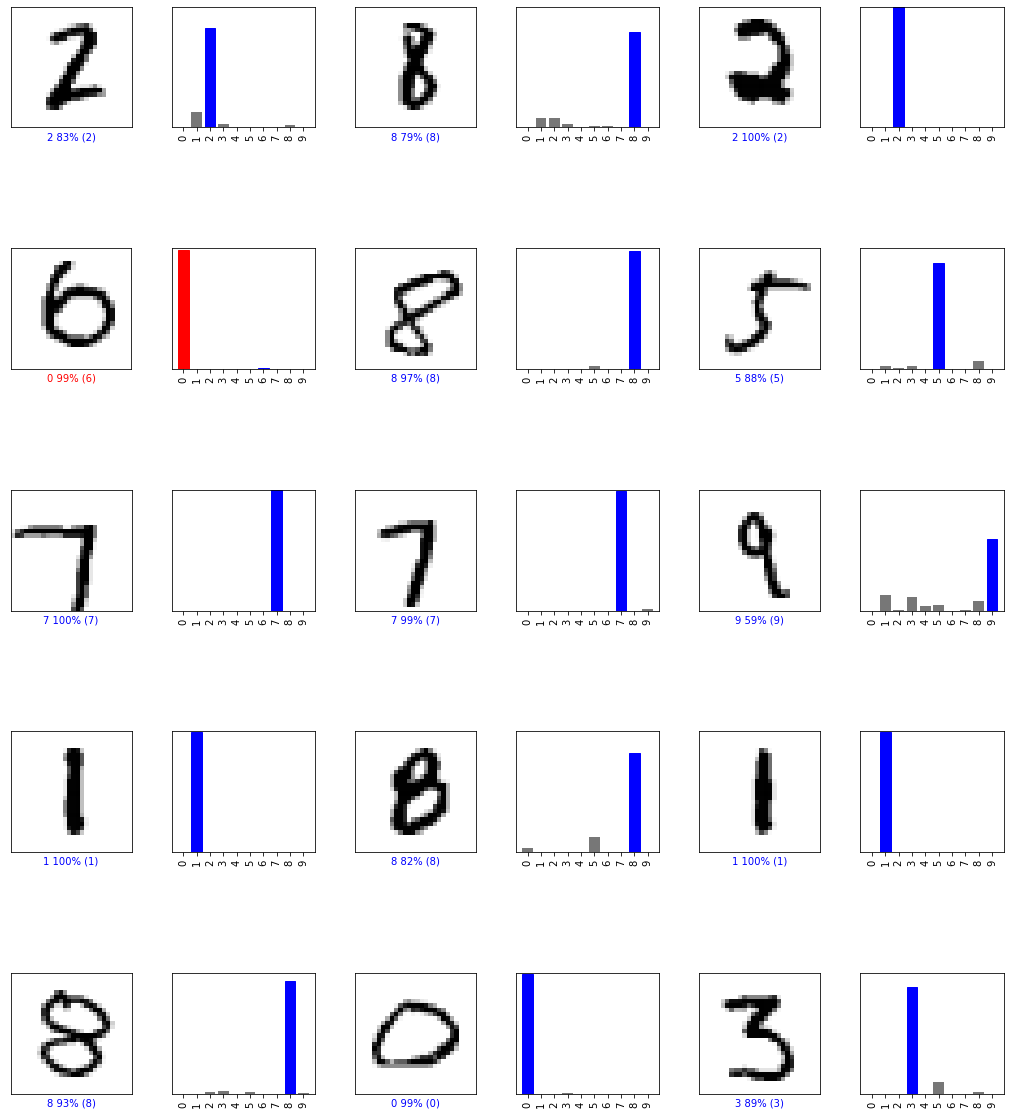

In [28]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = lr_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())  # images.numpy()를 imshow로 그린다.
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

In [29]:
 predictions = lr_model(images, training=False)

In [30]:
 predictions = lr_model.predict(images)

In [31]:
predictions[0]

array([5.9292656e-06, 1.2765911e-01, 8.2502323e-01, 2.6312046e-02,
       1.2888509e-07, 3.2504200e-04, 3.2052008e-04, 2.1297733e-06,
       2.0348376e-02, 3.3236829e-06], dtype=float32)

## 3층 DNN을 구축해보자

## 연습 7: 3층 DNN 구축

In [32]:
# 다음의 3층 DNN을 완성하라.
# input_shape=(28,28)를 사용하고
# 은닉층의 유닛을 256, 128로 하고 마지막 전결합 출력 유닛을 10로 하는 3층 신경망을 완성하라. 
# 은닉층의 활성화 함수는 relu 전결합층의 활성화함수는 softmax를 사용하라.
def create_mlp_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28))) #28*28 짜리니까 1열로 만들어줘야함 ( 잘모르겠음 나중에 찾아바야함)
    model.add(keras.layers.Dense(256,activation = 'relu'))
    model.add(keras.layers.Dense(128,activation = 'relu'))
    model.add(keras.layers.Dense(10,activation = 'softmax'))
    return model

In [33]:
mlp_model = create_mlp_model()
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [34]:
## 모델 컴파일
mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [35]:
## traing 전에 loss 및 validation accuracy 확인
mlp_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 1s 4ms/step - loss: 2.3484 - accuracy: 0.1541


[2.3492088317871094, 0.15564903616905212]

In [36]:
## 훈련
history = mlp_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 6s 10ms/step - loss: 0.2740 - accuracy: 0.9217 - val_loss: 0.1198 - val_accuracy: 0.9634
Epoch 2/10
468/468 [==============================] - 4s 9ms/step - loss: 0.1034 - accuracy: 0.9696 - val_loss: 0.0873 - val_accuracy: 0.9732
Epoch 3/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0664 - accuracy: 0.9794 - val_loss: 0.0797 - val_accuracy: 0.9755
Epoch 4/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.0870 - val_accuracy: 0.9717
Epoch 5/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0726 - val_accuracy: 0.9780
Epoch 6/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0694 - val_accuracy: 0.9794
Epoch 7/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0831 - val_accuracy: 0.9748
Epoch

# 학습결과 확인

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

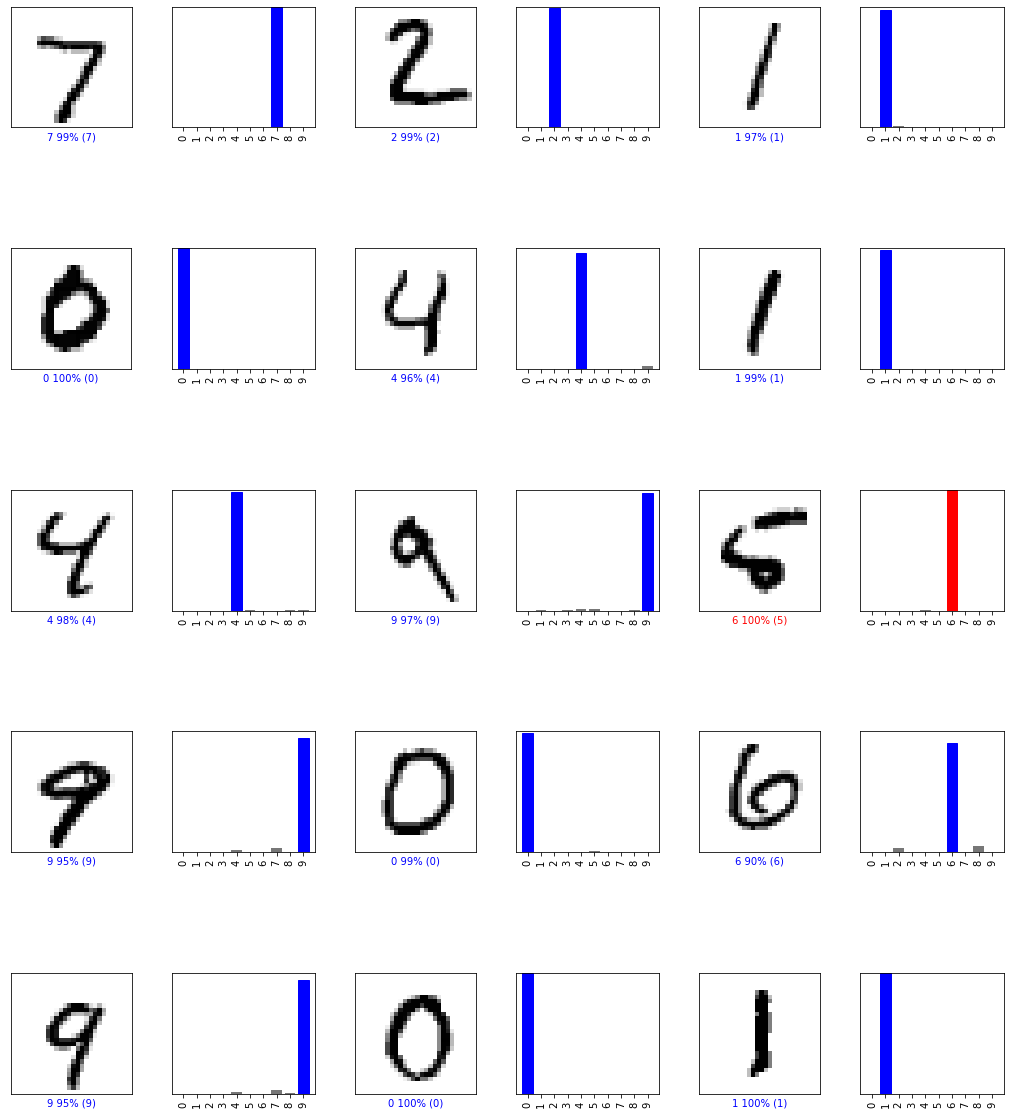

In [38]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = lr_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

## 이제 5층 DNN을 구축해보자

## 연습 8:  5층 DNN 구축

In [39]:
# 다음의 5층 DNN을 완성하라.
# input_shape=(28,28)를 사용하고
# 2개 은닉층의 유닛을 각각 256, 128로 하고 마지막 전결합 출력 유닛을 10로 하는 5층 신경망을 완성하라. 
# 은닉층의 활성화 함수는 relu 전결합층의 활성화함수는 softmax를 사용하라.

def create_dmlp_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28))) #28*28 짜리니까 1열로 만들어줘야함 ( 잘모르겠음 나중에 찾아바야함)
    model.add(keras.layers.Dense(256,activation = 'relu'))
    model.add(keras.layers.Dense(256,activation = 'relu'))
    model.add(keras.layers.Dense(128,activation = 'relu'))
    model.add(keras.layers.Dense(128,activation = 'relu'))
    model.add(keras.layers.Dense(10,activation = 'softmax'))
    return model

In [40]:
dmlp_model = create_dmlp_model()
dmlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [41]:
## 모델 컴파일
dmlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [42]:
## traing 전에 loss 및 validation accuracy 확인
dmlp_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 1s 3ms/step - loss: 2.3059 - accuracy: 0.0845


[2.306889295578003, 0.08293269574642181]

In [43]:
## 훈련
history = dmlp_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 4s 7ms/step - loss: 0.2554 - accuracy: 0.9249 - val_loss: 0.1237 - val_accuracy: 0.9620
Epoch 2/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0979 - accuracy: 0.9697 - val_loss: 0.1000 - val_accuracy: 0.9681
Epoch 3/10
468/468 [==============================] - 4s 9ms/step - loss: 0.0663 - accuracy: 0.9790 - val_loss: 0.0810 - val_accuracy: 0.9753
Epoch 4/10
468/468 [==============================] - 4s 9ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.1153 - val_accuracy: 0.9663
Epoch 5/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0380 - accuracy: 0.9874 - val_loss: 0.0815 - val_accuracy: 0.9752
Epoch 6/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0893 - val_accuracy: 0.9754
Epoch 7/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0276 - accuracy: 0.9909 - val_loss: 0.0830 - val_accuracy: 0.9776
Epoch 

## 드롭 아웃 (Drop-out)을 추가해보자

## 연습 9: 드롭아웃 추가

In [56]:
# 5층 DNN의 은닉층의 출력 다음 단계에 Dropout을 추가하라. kera.layers.Dropout(drop_rate)
drop_rate = 0.2 #랜덤하게 20% 줄이기 

def create_do_model():
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape=(28,28))) #28*28 짜리니까 1열로 만들어줘야함 ( 잘모르겠음 나중에 찾아바야함)
    model.add(keras.layers.Dense(256,activation = 'relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(256,activation = 'relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(128,activation = 'relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(128,activation = 'relu'))
    model.add(keras.layers.Dense(10,activation = 'softmax'))
    #output = tf.keras.layers.Dropout(...)(input)
    return model

In [57]:
do_model = create_do_model()
do_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [88]:
## 모델 컴파일
do_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [89]:
## traing 전에 loss 및 validation accuracy 확인
do_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 1s 5ms/step - loss: 0.1023 - accuracy: 0.9745


[0.08603034168481827, 0.9773637652397156]

In [90]:
## 훈련
history = do_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 7s 14ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.0753 - val_accuracy: 0.9812
Epoch 2/10
468/468 [==============================] - 6s 13ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0714 - val_accuracy: 0.9806
Epoch 3/10
468/468 [==============================] - 5s 10ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0698 - val_accuracy: 0.9836
Epoch 4/10
468/468 [==============================] - 6s 12ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0757 - val_accuracy: 0.9810
Epoch 5/10
468/468 [==============================] - 5s 11ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0781 - val_accuracy: 0.9818
Epoch 6/10
468/468 [==============================] - 6s 12ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0717 - val_accuracy: 0.9834
Epoch 7/10
468/468 [==============================] - 6s 12ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0676 - val_accuracy: 0.9835

## 가중치 감쇠: L2 규제화 (Weight Decay: L2 Regulrarization)를 적용해보자

## 연습 10: 가중치 감쇠 규제화

In [91]:
# 다음을 이용해서 5층 DNN의 규제화를 완성하라. (Dropout 대신 규제화를 사용한다.)
# kernel_regularizer=keras.regularizers.l2(reg_weight),
# bias_regularizer=keras.regularizers.l2(reg_weight
reg_weight = 0.00002

def create_l2r_model():
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape=(28,28))) #28*28 짜리니까 1열로 만들어줘야함 ( 잘모르겠음 나중에 찾아바야함)
    model.add(keras.layers.Dense(256,activation = 'relu', 
              kernel_regularizer=keras.regularizers.l2(reg_weight) ,
              bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(256,activation = 'relu', 
              kernel_regularizer=keras.regularizers.l2(reg_weight) ,
              bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(128,activation = 'relu' ,
              kernel_regularizer=keras.regularizers.l2(reg_weight) ,
              bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(128,activation = 'relu', 
              kernel_regularizer=keras.regularizers.l2(reg_weight) ,
              bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(10,activation = 'softmax',
              kernel_regularizer=keras.regularizers.l2(reg_weight) ,
              bias_regularizer=keras.regularizers.l2(reg_weight)))
    return model

In [92]:
l2r_model = create_l2r_model()
l2r_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_56 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
_______________________________________________

In [93]:
## 모델 컴파일
l2r_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [94]:
## traing 전에 loss 및 validation accuracy 확인
l2r_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 1s 4ms/step - loss: 2.3351 - accuracy: 0.0972


[2.336247444152832, 0.09805689007043839]

In [95]:
## 훈련
history = l2r_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 7s 13ms/step - loss: 0.2799 - accuracy: 0.9216 - val_loss: 0.1539 - val_accuracy: 0.9581
Epoch 2/10
468/468 [==============================] - 5s 10ms/step - loss: 0.1158 - accuracy: 0.9701 - val_loss: 0.1050 - val_accuracy: 0.9718
Epoch 3/10
468/468 [==============================] - 5s 10ms/step - loss: 0.0849 - accuracy: 0.9800 - val_loss: 0.1177 - val_accuracy: 0.9702
Epoch 4/10
468/468 [==============================] - 5s 10ms/step - loss: 0.0710 - accuracy: 0.9837 - val_loss: 0.0904 - val_accuracy: 0.9788
Epoch 5/10
468/468 [==============================] - 5s 11ms/step - loss: 0.0602 - accuracy: 0.9880 - val_loss: 0.0976 - val_accuracy: 0.9778
Epoch 6/10
468/468 [==============================] - 5s 10ms/step - loss: 0.0559 - accuracy: 0.9891 - val_loss: 0.0900 - val_accuracy: 0.9807
Epoch 7/10
468/468 [==============================] - 6s 12ms/step - loss: 0.0512 - accuracy: 0.9904 - val_loss: 0.1160 - val_accuracy: 0.9735

## 배치 정규화 (Batch Normalization)를 추가해보자

## 연습 11 배치 정규화 추가

In [107]:
# BatchNormalizatio()과 ReLu()를 이용해 5층 DNN을 완성하라.
# 배치를 먼저하고 Relu를 사용(활성화함수) 
def create_bn_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28))) #28*28 짜리니까 1열로 만들어줘야함 ( 잘모르겠음 나중에 찾아바야함)
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())
    return model

#drop out 보다는 Batch Normaliztion이 대체했다. 
#tanh의 값이 너무 커질때 기울기 손실 문제를 줄여줄수 있는게 Batch Norm이다. 

In [108]:
bn_model = create_bn_model()
bn_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)             

In [79]:
## 모델 컴파일
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [80]:
## traing 전에 loss 및 validation accuracy 확인
bn_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 4ms/step - loss: 2.3027 - accuracy: 0.1198


[2.302701950073242, 0.1197916641831398]

In [81]:
## 훈련
history = bn_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 8s 17ms/step - loss: 0.4039 - accuracy: 0.9362 - val_loss: 0.2149 - val_accuracy: 0.9721
Epoch 2/10
468/468 [==============================] - 7s 15ms/step - loss: 0.1714 - accuracy: 0.9746 - val_loss: 0.1252 - val_accuracy: 0.9779
Epoch 3/10
468/468 [==============================] - 6s 13ms/step - loss: 0.1073 - accuracy: 0.9824 - val_loss: 0.1045 - val_accuracy: 0.9757
Epoch 4/10
468/468 [==============================] - 7s 14ms/step - loss: 0.0784 - accuracy: 0.9861 - val_loss: 0.0868 - val_accuracy: 0.9760
Epoch 5/10
468/468 [==============================] - 6s 13ms/step - loss: 0.0594 - accuracy: 0.9880 - val_loss: 0.0770 - val_accuracy: 0.9793
Epoch 6/10
468/468 [==============================] - 7s 15ms/step - loss: 0.0447 - accuracy: 0.9913 - val_loss: 0.0793 - val_accuracy: 0.9795
Epoch 7/10
468/468 [==============================] - 8s 17ms/step - loss: 0.0358 - accuracy: 0.9929 - val_loss: 0.0645 - val_accuracy: 0.9834

## 학습률을 조정해보자 (Learning Rate Decay라고도 부른다.)
+ 학습률 감쇠 방법:스텝
+ 스텝: 고정된 몇 포인트에서 "학습률" 감소
+ ResNet은 30,60,90 에폭에서 LR에 0.1을 곱한다.

In [118]:
lr_decay_model = create_dmlp_model()
lr_decay_model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_66 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_67 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_68 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_69 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
_______________________________________________

In [119]:
n_train//batch_size*10

4680

In [120]:
### learning rate scheduler - exponential decay
### initial learning rate: 초기 learning rate
### decay_steps: 몇 step 후에 learning rate을 감소시킬 것인지
### decay_rate: learning rate 감소 비율
### staircase: 계단식 감소여부(False일 경우는 매 step마다 감소하여 decay steps에 도달하였을 때 decay_rate만큼 감소됨) 
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=n_train//batch_size*10,
                                                          decay_rate=0.3,
                                                          staircase=True)

In [121]:
## 모델 컴파일
lr_decay_model.compile(optimizer=keras.optimizers.Adam(lr_schedule),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [122]:
## traing 전에 loss 및 validation accuracy 확인
lr_decay_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 1s 3ms/step - loss: 2.3187 - accuracy: 0.0688


[2.3174824714660645, 0.07231570780277252]

In [123]:
## 훈련
history = lr_decay_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 4s 8ms/step - loss: 0.2629 - accuracy: 0.9200 - val_loss: 0.1222 - val_accuracy: 0.9641
Epoch 2/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0952 - accuracy: 0.9707 - val_loss: 0.0902 - val_accuracy: 0.9719
Epoch 3/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0780 - val_accuracy: 0.9753
Epoch 4/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0498 - accuracy: 0.9842 - val_loss: 0.0815 - val_accuracy: 0.9747
Epoch 5/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0775 - val_accuracy: 0.9781
Epoch 6/10
468/468 [==============================] - 4s 10ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0807 - val_accuracy: 0.9773
Epoch 7/10
468/468 [==============================] - 4s 8ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0872 - val_accuracy: 0.9756
Epoch

### 자 이제 각자의 모델을 한 번 만들어 보자

In [155]:
def create_my_model():
    model = keras.Sequential()

    
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28))) #28*28 짜리니까 1열로 만들어줘야함 ( 잘모르겠음 나중에 찾아바야함)
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(drop_rate))
    '''
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(drop_rate))

     
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(drop_rate))
    
    
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(drop_rate))
    '''
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())
    
    return model

In [156]:
my_model = create_my_model()
my_model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_35 (Batc (None, 256)               1024      
_________________________________________________________________
re_lu_27 (ReLU)              (None, 256)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 10)                2570      
_________________________________________________________________
batch_normalization_36 (Batc (None, 10)              

In [157]:
## model compile
my_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [158]:
## traing 전에 loss 및 validation accuracy 확인
my_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 2s 11ms/step - loss: 2.3522 - accuracy: 0.1792


[2.3323235511779785, 0.19040465354919434]

In [159]:
## training
history = my_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 13s 20ms/step - loss: 0.5427 - accuracy: 0.9107 - val_loss: 0.3017 - val_accuracy: 0.9621.5489 - accura - ETA: 0s - loss: 0.5436 - accuracy: 
Epoch 2/10
468/468 [==============================] - 9s 19ms/step - loss: 0.2840 - accuracy: 0.9564 - val_loss: 0.1827 - val_accuracy: 0.9717
Epoch 3/10
468/468 [==============================] - 6s 14ms/step - loss: 0.1945 - accuracy: 0.9688 - val_loss: 0.1451 - val_accuracy: 0.9756
Epoch 4/10
468/468 [==============================] - 5s 11ms/step - loss: 0.1497 - accuracy: 0.9743 - val_loss: 0.1129 - val_accuracy: 0.9774
Epoch 5/10
468/468 [==============================] - 4s 10ms/step - loss: 0.1184 - accuracy: 0.9783 - val_loss: 0.0996 - val_accuracy: 0.9787
Epoch 6/10
468/468 [==============================] - 5s 10ms/step - loss: 0.0967 - accuracy: 0.9820 - val_loss: 0.0861 - val_accuracy: 0.9781
Epoch 7/10
468/468 [==============================] - 4s 10ms/step - loss: 0.0847 - accur